In [634]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [635]:
df = pd.read_csv('D:\Micro Credit Project\Data file.csv')

In [636]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [637]:
del df['Unnamed: 0']

In [638]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [639]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [640]:
df['pcircle'].unique() # only one value in the column

array(['UPW'], dtype=object)

In [641]:
del df['pcircle']

In [642]:
# converting the object type data type to date
df['pdate'] = pd.to_datetime(df['pdate'])

In [643]:
df['year'] = df['pdate'].dt.year
df['month'] = df['pdate'].dt.month
df['day_no'] = df['pdate'].dt.day

In [644]:
df['year'].unique()

array([2016], dtype=int64)

In [645]:
del df['year']

In [646]:
del df['pdate']

In [647]:
# grouping by frequency
fq = df.groupby('msisdn').size()/len(df)
# mapping values to dataframe
df.loc[:, "{}_freq_encode".format('msisdn')] = df['msisdn'].map(fq)
# drop original column.
df = df.drop(['msisdn'], axis=1)

In [648]:
from sklearn.model_selection import train_test_split

In [649]:
#from sklearn.preprocessing import StandardScaler
## Initializing the StandardScaler
#X_scaler = StandardScaler()
## Standardize all the feature columns
#X_scaled = X_scaler.fit_transform(x)

## standardizing y explictly by subtracting mean and Dividing by standard deviation
#Y = (y-y.mean())/y.std()

In [650]:
# dataset contain many nagative value and many outliers 
# applying power transformation here 
d = pd.DataFrame()
from feature_engine import transformation as vt
tf = vt.PowerTransformer(variables = ['aon','daily_decr30','daily_decr90','rental30','rental90','last_rech_date_ma',
                                      'last_rech_date_da','last_rech_amt_ma','fr_ma_rech30','sumamnt_ma_rech30',
                                     'medianamnt_ma_rech30','medianmarechprebal30','cnt_ma_rech90','fr_ma_rech90',
                                      'sumamnt_ma_rech90','medianamnt_ma_rech90','medianmarechprebal90',
                                      'cnt_da_rech30','fr_da_rech30','fr_da_rech90','cnt_da_rech90',
                                     'amnt_loans30','cnt_loans30','maxamnt_loans30','cnt_loans90','amnt_loans90',
                                      'medianamnt_loans90','payback30','payback90',], exp=0.5)
tf.fit(df)
Df = tf.transform(df)

In [651]:
Df.shape

(209593, 36)

In [652]:
Df.dropna(inplace=True)
Df

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,day_no,msisdn_freq_encode
0,0,16.492423,55.272507,55.363797,14.836779,16.128546,1.414214,0.000000,39.230090,2,...,0.0,1.414214,3.464102,6,0.0,5.385165,5.385165,7,20,0.000005
1,1,26.683328,110.099955,110.112443,60.755740,60.755740,4.472136,0.000000,76.072334,1,...,0.0,1.000000,3.464102,12,0.0,0.000000,0.000000,8,10,0.000005
2,1,23.130067,37.389838,37.389838,30.002167,30.002167,1.732051,0.000000,39.230090,1,...,0.0,1.000000,2.449490,6,0.0,0.000000,0.000000,8,19,0.000005
3,1,15.524175,4.607385,4.607385,12.626163,12.626163,6.403124,0.000000,30.773365,0,...,0.0,1.414214,3.464102,6,0.0,0.000000,0.000000,6,6,0.000010
4,1,30.773365,12.272707,12.272707,33.149661,33.149661,2.000000,0.000000,48.052055,7,...,0.0,2.645751,6.480741,6,0.0,1.527525,1.527525,6,22,0.000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,20.099751,12.323649,12.323649,33.002879,33.002879,1.000000,0.000000,63.623895,3,...,0.0,1.414214,3.464102,6,0.0,1.000000,1.000000,6,17,0.000005
209589,1,32.787193,6.077499,6.077499,41.573549,41.573549,2.000000,0.000000,27.802878,4,...,0.0,1.732051,4.242641,6,0.0,1.000000,1.000000,6,12,0.000010
209590,1,31.827661,108.826062,109.107058,76.562589,94.303765,1.732051,0.000000,39.230090,5,...,0.0,2.449490,7.348469,12,0.0,2.000000,1.957890,7,29,0.000010
209591,1,41.617304,111.750742,112.135498,20.293595,31.378018,1.414214,6.164414,27.802878,5,...,0.0,1.732051,4.898979,12,0.0,0.000000,3.240370,7,25,0.000005


In [653]:
# Capping the outliers 
df_cap = Df.copy()

features = Df.drop(["label"],axis = 1)

def iqr_capping(df,cols,factor):
    
    for col in cols:
        
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        
        IQR = Q3 - Q1
        
        upper = Q3 + (factor*IQR)
        lower = Q1 - (factor*IQR)
        
        df[col]=np.where(df[col]>upper,upper,
                 np.where(df[col]<lower,lower,df[col]))

In [654]:
iqr_capping(df_cap, features, 1.5)

In [655]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197333 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 197333 non-null  int64  
 1   aon                   197333 non-null  float64
 2   daily_decr30          197333 non-null  float64
 3   daily_decr90          197333 non-null  float64
 4   rental30              197333 non-null  float64
 5   rental90              197333 non-null  float64
 6   last_rech_date_ma     197333 non-null  float64
 7   last_rech_date_da     197333 non-null  float64
 8   last_rech_amt_ma      197333 non-null  float64
 9   cnt_ma_rech30         197333 non-null  int64  
 10  fr_ma_rech30          197333 non-null  float64
 11  sumamnt_ma_rech30     197333 non-null  float64
 12  medianamnt_ma_rech30  197333 non-null  float64
 13  medianmarechprebal30  197333 non-null  float64
 14  cnt_ma_rech90         197333 non-null  float64
 15  

In [656]:
x = Df.drop(['label'],axis = 1)
y = Df['label']

In [657]:
# Separate into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.25, random_state=0)

In [658]:
import statsmodels.api as sm

logit = sm.Logit(y_train, X_train)
logit_model = logit.fit()

         Current function value: 0.279552
         Iterations: 35


In [659]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                  Results: Logit
==================================================================================
Model:                     Logit                 Pseudo R-squared:      0.230     
Dependent Variable:        label                 AIC:                   82816.7096
Date:                      2023-01-19 22:38      BIC:                   83163.3832
No. Observations:          147999                Log-Likelihood:        -41373.   
Df Model:                  34                    LL-Null:               -53736.   
Df Residuals:              147964                LLR p-value:           0.0000    
Converged:                 0.0000                Scale:                 1.0000    
No. Iterations:            35.0000                                                
----------------------------------------------------------------------------------
                        Coef.     Std.Err.    z     P>|z|     [0.025      0.975]  
----------------------------------------------------------------------------------
aon                       0.0002    0.0001   1.3648 0.1723     -0.0001      0.0004
daily_decr30             -0.3334    0.0212 -15.7249 0.0000     -0.3750     -0.2919
daily_decr90              0.3313    0.0212  15.6306 0.0000      0.2897      0.3728
rental30                 -0.0066    0.0018  -3.6613 0.0003     -0.0102     -0.0031
rental90                 -0.0030    0.0017  -1.8041 0.0712     -0.0063      0.0003
last_rech_date_ma         0.0003    0.0002   1.8878 0.0591     -0.0000      0.0006
last_rech_date_da         0.0002    0.0001   1.0723 0.2836     -0.0001      0.0005
last_rech_amt_ma          0.0091    0.0013   6.8089 0.0000      0.0065      0.0118
cnt_ma_rech30            -0.0094    0.0161  -0.5859 0.5579     -0.0410      0.0221
fr_ma_rech30              0.0002    0.0002   1.1233 0.2613     -0.0001      0.0005
sumamnt_ma_rech30         0.0162    0.0016  10.0590 0.0000      0.0130      0.0194
medianamnt_ma_rech30     -0.0049    0.0017  -2.9601 0.0031     -0.0082     -0.0017
medianmarechprebal30     -0.0002    0.0001  -1.3056 0.1917     -0.0004      0.0001
cnt_ma_rech90             0.1847    0.0346   5.3398 0.0000      0.1169      0.2525
fr_ma_rech90              0.0667    0.0054  12.4416 0.0000      0.0562      0.0772
sumamnt_ma_rech90         0.0046    0.0011   4.2457 0.0000      0.0025      0.0067
medianamnt_ma_rech90     -0.0139    0.0017  -8.2192 0.0000     -0.0172     -0.0106
medianmarechprebal90      0.0350    0.0020  17.5830 0.0000      0.0311      0.0389
cnt_da_rech30             0.0004    0.0006   0.6365 0.5244     -0.0008      0.0015
fr_da_rech30             -0.0001    0.0001  -0.4738 0.6357     -0.0004      0.0002
cnt_da_rech90             0.2243    0.0566   3.9596 0.0001      0.1133      0.3353
fr_da_rech90             -0.2349    0.0435  -5.3988 0.0000     -0.3201     -0.1496
cnt_loans30              -5.0594    0.2495 -20.2793 0.0000     -5.5484     -4.5704
amnt_loans30              2.0749    0.1077  19.2731 0.0000      1.8639      2.2859
maxamnt_loans30          -0.0005    0.0005  -0.9677 0.3332     -0.0016      0.0005
medianamnt_loans30        0.8985    0.1823   4.9280 0.0000      0.5411      1.2558
cnt_loans90               0.0030    0.0025   1.2028 0.2291     -0.0019      0.0078
amnt_loans90              0.3220    0.0277  11.6265 0.0000      0.2677      0.3763
maxamnt_loans90          -0.3564    0.0151 -23.6378 0.0000     -0.3859     -0.3268
medianamnt_loans90        0.0345    0.1753   0.1968 0.8440     -0.3090      0.3780
payback30                 0.0481    0.0128   3.7657 0.0002      0.0231      0.0732
payback90                -0.0506    0.0114  -4.4558 0.0000     -0.0729     -0.0284
month                     0.2921    0.0132  22.1002 0.0000      0.2662      0.3180
day_no                   -0.0028    0.0011  -2.5300 0.0114     -0.0050     -0.0006
msisdn_freq_encode   -19903.2656 4490.2564  -4.4325 0.0000 -28704.0064 -11102.5248
=

In [660]:
def get_significant_vars(lm):
    #Store the p-values and corresponding column names in a dataFrame
    var_p_vals_df = pd.DataFrame(lm.pvalues)
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals','vars']
    # filter the column names where p-value is less than 0.05
    return list(var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'])

In [661]:
# Taking only the important variable 
significant_vars = get_significant_vars(logit_model)
significant_vars

['daily_decr30',
 'daily_decr90',
 'rental30',
 'last_rech_amt_ma',
 'sumamnt_ma_rech30',
 'medianamnt_ma_rech30',
 'cnt_ma_rech90',
 'fr_ma_rech90',
 'sumamnt_ma_rech90',
 'medianamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_da_rech90',
 'fr_da_rech90',
 'cnt_loans30',
 'amnt_loans30',
 'medianamnt_loans30',
 'amnt_loans90',
 'maxamnt_loans90',
 'payback30',
 'payback90',
 'month',
 'day_no',
 'msisdn_freq_encode']

In [662]:
final_logit = sm.Logit(y_train,sm.add_constant(X_train[significant_vars])).fit()

         Current function value: 0.279351
         Iterations: 35


In [663]:
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                  Results: Logit
==================================================================================
Model:                     Logit                 Pseudo R-squared:      0.231     
Dependent Variable:        label                 AIC:                   82735.3721
Date:                      2023-01-19 22:38      BIC:                   82973.0912
No. Observations:          147999                Log-Likelihood:        -41344.   
Df Model:                  23                    LL-Null:               -53736.   
Df Residuals:              147975                LLR p-value:           0.0000    
Converged:                 0.0000                Scale:                 1.0000    
No. Iterations:            35.0000                                                
----------------------------------------------------------------------------------
                        Coef.     Std.Err.    z     P>|z|     [0.025      0.975]  
----------------------------------------------------------------------------------
const                     1.6227    0.1981   8.1908 0.0000      1.2344      2.0110
daily_decr30             -0.3425    0.0215 -15.8924 0.0000     -0.3847     -0.3002
daily_decr90              0.3425    0.0216  15.8883 0.0000      0.3003      0.3848
rental30                 -0.0098    0.0003 -29.4034 0.0000     -0.0105     -0.0092
last_rech_amt_ma          0.0091    0.0013   6.7994 0.0000      0.0064      0.0117
sumamnt_ma_rech30         0.0157    0.0011  14.3180 0.0000      0.0135      0.0178
medianamnt_ma_rech30     -0.0047    0.0013  -3.5374 0.0004     -0.0074     -0.0021
cnt_ma_rech90             0.1771    0.0244   7.2668 0.0000      0.1293      0.2248
fr_ma_rech90              0.0673    0.0052  12.8781 0.0000      0.0571      0.0776
sumamnt_ma_rech90         0.0042    0.0010   4.1497 0.0000      0.0022      0.0061
medianamnt_ma_rech90     -0.0137    0.0017  -8.1720 0.0000     -0.0170     -0.0104
medianmarechprebal90      0.0350    0.0020  17.6665 0.0000      0.0311      0.0389
cnt_da_rech90             0.2214    0.0567   3.9079 0.0001      0.1104      0.3325
fr_da_rech90             -0.2278    0.0436  -5.2206 0.0000     -0.3133     -0.1423
cnt_loans30              -6.9413    0.3656 -18.9868 0.0000     -7.6579     -6.2248
amnt_loans30              2.8227    0.1517  18.6082 0.0000      2.5254      3.1200
medianamnt_loans30        0.9358    0.0519  18.0249 0.0000      0.8341      1.0376
amnt_loans90              0.3332    0.0276  12.0629 0.0000      0.2790      0.3873
maxamnt_loans90          -0.4661    0.0216 -21.5511 0.0000     -0.5085     -0.4237
payback30                 0.0493    0.0128   3.8653 0.0001      0.0243      0.0743
payback90                -0.0487    0.0114  -4.2928 0.0000     -0.0710     -0.0265
month                     0.1481    0.0212   6.9785 0.0000      0.1065      0.1897
day_no                   -0.0045    0.0011  -3.9985 0.0001     -0.0067     -0.0023
msisdn_freq_encode   -19587.7175 4498.6495  -4.3541 0.0000 -28404.9086 -10770.5265
==================================================================================

"""

In [664]:
# predicting on Test Data

y_pred_df = pd.DataFrame({"actual": y_test,"Predicted_prob": final_logit.predict(sm.add_constant(X_test[significant_vars]))})

y_pred_df.sample(10,random_state = 42)

,actual,Predicted_prob
57409,1,0.995266
67573,1,0.840682
121395,1,0.568602
208698,1,0.990175
4089,1,0.962660
33625,0,0.640292
150233,1,0.767449
117862,1,0.541173
149056,1,0.912004
135709,0,0.868872


In [665]:
# finding Optimal Classification Cut-off, let us assume it to be 0.5
y_pred_df['predicted'] = y_pred_df.Predicted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_pred_df.sample(10,random_state = 42)

,actual,Predicted_prob,predicted
57409,1,0.995266,1
67573,1,0.840682,1
121395,1,0.568602,1
208698,1,0.990175,1
4089,1,0.962660,1
33625,0,0.640292,1
150233,1,0.767449,1
117862,1,0.541173,1
149056,1,0.912004,1
135709,0,0.868872,1


In [666]:
# Creating confusion Matrix

import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline


In [667]:
from sklearn import metrics
def draw_cm(actual,predicted):
    ## Cret
    cm = metrics.confusion_matrix( actual , predicted)
    sn.heatmap(cm, annot = True, fmt = ' .2f',
              xticklabels = ["Bad Label", "Good Label"],
              yticklabels = ["Bad Label", "Good Label"])
    plt.ylabel('True Label')
    plt.Xlabel('Predicted Label')
    Plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'Xlabel'

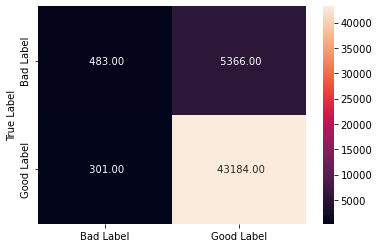

In [668]:
draw_cm(y_pred_df.actual,y_pred_df.predicted)

In [669]:
print(metrics.classification_report(y_pred_df.actual,y_pred_df.predicted))

              precision    recall  f1-score   support

           0       0.62      0.08      0.15      5849
           1       0.89      0.99      0.94     43485

    accuracy                           0.89     49334
   macro avg       0.75      0.54      0.54     49334
weighted avg       0.86      0.89      0.84     49334



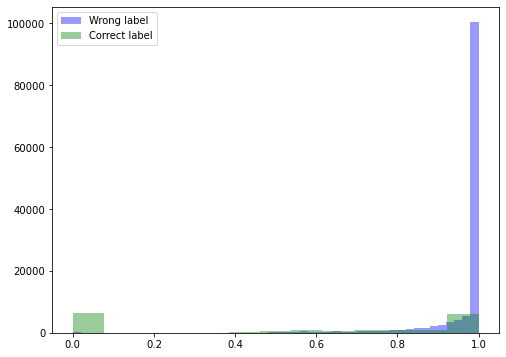

In [670]:
# Predicted probability plot
plt.figure(figsize = (8,6))
# plotting distribution of predicted probability values for wrong label
sn.distplot(y_pred_df[y_pred_df.actual == 1],
           kde=False, color = 'b',
           label = 'Wrong label')
# plotting distribution of predicted probability values for good credits 
sn.distplot(y_pred_df[y_pred_df.actual == 0],
           kde=False, color = 'g',
           label = 'Correct label')

plt.legend()
plt.show()

In [671]:
# ROC and AUC 
def draw_roc(actual,probs):
    fpr,tpr,thresholds = metrics.roc_curve(actual,probs,drop_intermediate = False)
    
    auc_score = metrics.roc_auc_score(actual,probs)
    plt.figure(figsize = (8,6))

    plt.plot(fpr,tpr,label = 'ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True positive Rate')
    plt.legend(loc = "lower right")
    plt.show()

    return fpr,tpr,thresholds



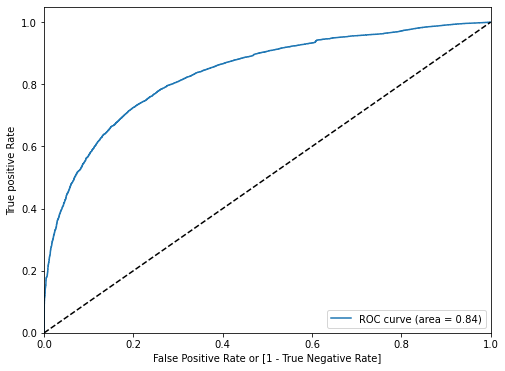

In [672]:
fpr,tpr,thresholds = draw_roc(y_pred_df.actual,
                             y_pred_df.Predicted_prob)

In [673]:
auc_score = metrics.roc_auc_score(y_pred_df.actual,
                                 y_pred_df.Predicted_prob)
round(float(auc_score),2)

0.84

In [ ]:
# Separate into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.25, random_state=0)

In [675]:
from sklearn.ensemble import RandomForestClassifier

radm_clf = RandomForestClassifier(max_depth = 10, n_estimators = 10)
radm_clf.fit(X_train,y_train)



RandomForestClassifier(max_depth=10, n_estimators=10)

In [679]:
y_pred_df = pd.DataFrame({"actual": y_test,"Predicted_prob": radm_clf.predict(X_test)})

y_pred_df.sample(10,random_state = 42)

,actual,Predicted_prob
57409,1,1
67573,1,1
121395,1,1
208698,1,1
4089,1,1
33625,0,0
150233,1,1
117862,1,1
149056,1,1
135709,0,1


In [680]:
y_pred_df['predicted'] = y_pred_df.Predicted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_pred_df.sample(10,random_state = 42)

,actual,Predicted_prob,predicted
57409,1,1,1
67573,1,1,1
121395,1,1,1
208698,1,1,1
4089,1,1,1
33625,0,0,0
150233,1,1,1
117862,1,1,1
149056,1,1,1
135709,0,1,1


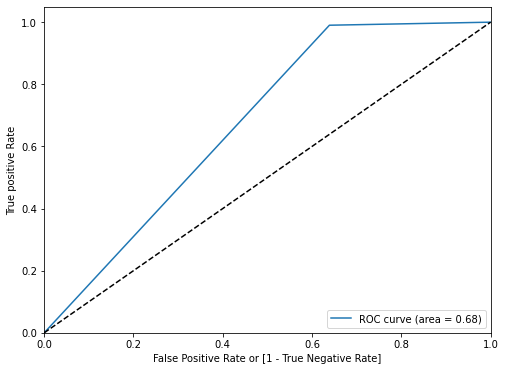

In [681]:
fpr,tpr,thresholds = draw_roc(y_pred_df.actual,
                             y_pred_df.Predicted_prob)